<div>
    <h1 align="center">Tabular Playground Series - Jul 2021</h1>
    <h1 align="center">XGBoost & LeaveOneGroupOut & Ensembling</h1>
    <h4 align="center">By: Somayyeh Gholami & Mehran Kazeminia</h4>
</div>

<div class="alert alert-success">  
</div>

<div class="alert alert-success">
    <h1 align="center">If you find this work useful, please don't forget upvoting :)</h1>
</div>

## Import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv
/kaggle/input/tps7-21744/Rplot001.png
/kaggle/input/tps7-21744/Rplot002.png
/kaggle/input/tps7-21744/submission_gam.csv
/kaggle/input/tps7-21744/Rplot003.png


<div class="alert alert-success">  
</div>

## Data Set

In [4]:
DF1 = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv')

DF2 = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv')

SAM = pd.read_csv('../input/tabular-playground-series-jul-2021/sample_submission.csv')

In [5]:
MV1 = DF1.isnull().sum()
MV2 = DF2.isnull().sum()

print(f'Missing Value 1:  {MV1[MV1 > 0]}')
print(f'Missing Value 2:  {MV2[MV2 > 0]}')

Missing Value 1:  Series([], dtype: int64)
Missing Value 2:  Series([], dtype: int64)


In [6]:
display(DF1, DF2)
# display(DF1.info(), DF2.info())
# display(DF1.describe().transpose())
# display(DF2.describe().transpose())

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


<div class="alert alert-success">  
</div>

In [7]:
data1 = DF1.copy()
data2 = DF2.copy()

In [8]:
X = data1.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
X['date_time'] = X['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

display(X)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1.268244e+09,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4
1,1.268248e+09,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9
2,1.268251e+09,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0
3,1.268255e+09,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2
4,1.268258e+09,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2
...,...,...,...,...,...,...,...,...,...
7106,1.293826e+09,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5
7107,1.293829e+09,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4
7108,1.293833e+09,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1
7109,1.293836e+09,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3


In [9]:
y1 = data1.target_carbon_monoxide
y2 = data1.target_benzene
y3 = data1.target_nitrogen_oxides
# display(y1, y2, y3)

In [10]:
XX = data2.copy()
XX['date_time'] = XX['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

display(XX)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1.293840e+09,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,1.293844e+09,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,1.293847e+09,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,1.293851e+09,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,1.293854e+09,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,1.301911e+09,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,1.301915e+09,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,1.301918e+09,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,1.301922e+09,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


<div class="alert alert-success">  
</div>

## Split

In [11]:
train_X, val_X, train_y1, val_y1 = train_test_split(X, y1, test_size=0.50, random_state=123)
train_X, val_X, train_y2, val_y2 = train_test_split(X, y2, test_size=0.50, random_state=123)
train_X, val_X, train_y3, val_y3 = train_test_split(X, y3, test_size=0.50, random_state=123)

In [12]:
val_X.to_csv("val_X.csv",index=False)

val_y1.to_csv("val_y1.csv",index=False)
val_y2.to_csv("val_y2.csv",index=False)
val_y3.to_csv("val_y3.csv",index=False)

<div class="alert alert-success">
    <h1 align="center">XGBRegressor</h1>
</div>

## Validation Model - 1 

### [ target_carbon_monoxide ]

In [13]:
model1v = XGBRegressor(max_depth=6,
                       n_estimators=250,
                       learning_rate=0.08,
                       subsample=0.7,
                       alpha=0.5,
                       random_state=123)                           
        
model1v.fit(train_X, train_y1, verbose=100)
oof_pred1 = model1v.predict(val_X)

oof_pred1 = np.clip(oof_pred1, 0.30, y1.max())
# oof_pred1 = np.clip(oof_pred1, y1.min(), y1.max())

print(40 * '=')
print(f'Mean Absolute Error: {mean_absolute_error(val_y1, oof_pred1)}')
print(40 * '=')

Mean Absolute Error: 0.2560567335333545


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [14]:
model1v.feature_importances_

array([0.02482429, 0.0185142 , 0.00925024, 0.02536976, 0.14704499,
       0.7003592 , 0.01702597, 0.01739425, 0.040217  ], dtype=float32)

<div class="alert alert-success">  
</div>

## Validation Model - 2 

### [ target_benzene ]

In [15]:
model2v = XGBRegressor(max_depth=6,
                       n_estimators=400,
                       learning_rate=0.07,
                       subsample=0.7,
                       alpha=0.7,
                       random_state=123)          

model2v.fit(train_X, train_y2, verbose=100)
oof_pred2 = model2v.predict(val_X)

oof_pred2 = np.clip(oof_pred2, 0.10, y2.max())
# oof_pred2 = np.clip(oof_pred2, y1.max(), y2.max())

print(40 * '=')
print(f'Mean Absolute Error: {mean_absolute_error(val_y2, oof_pred2)}')
print(40 * '=')

Mean Absolute Error: 0.7641871077460064


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [16]:
model2v.feature_importances_

array([0.00322617, 0.0028076 , 0.0039978 , 0.0043496 , 0.0052299 ,
       0.9461059 , 0.01227217, 0.01056899, 0.01144179], dtype=float32)

<div class="alert alert-success">  
</div>

## Validation Model - 3 

### [ target_nitrogen_oxides ]

In [17]:
model3v = XGBRegressor(max_depth=8,
                       n_estimators=500,
                       learning_rate=0.03,
                       subsample=0.7,
                       alpha=0.8,
                       random_state=123)                           

model3v.fit(train_X, train_y3, verbose=100)
oof_pred3 = model3v.predict(val_X)

oof_pred3 = np.clip(oof_pred3, 20.0, y3.max())
# oof_pred3 = np.clip(oof_pred3, y3.min(), y3.max())

print(40 * '=')
print(f'Mean Absolute Error: {mean_absolute_error(val_y3, oof_pred3)}')
print(40 * '=')

Mean Absolute Error: 29.972108888572464


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [18]:
model3v.feature_importances_

array([0.11326692, 0.01919963, 0.00936951, 0.02463191, 0.0673358 ,
       0.12975633, 0.51992625, 0.03120606, 0.08530759], dtype=float32)

<div class="alert alert-success">  
</div>

## Feature Importances

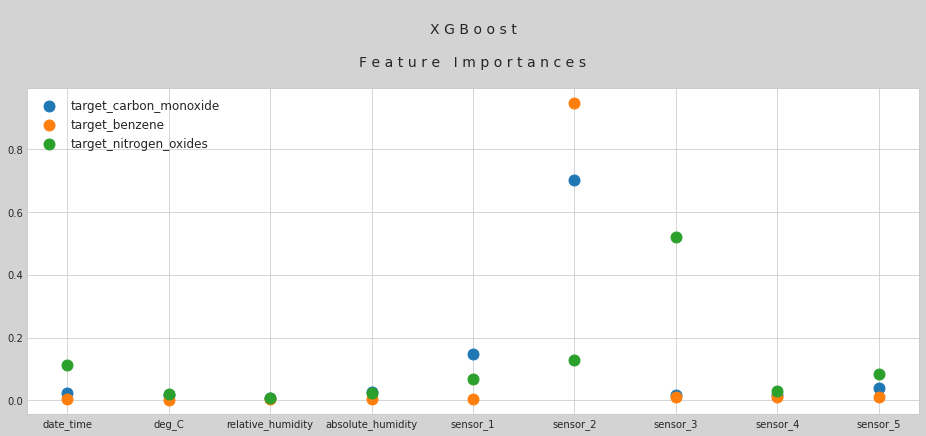

In [19]:
axis_x  = X.columns.values
axis_y1 = model1v.feature_importances_
axis_y2 = model2v.feature_importances_
axis_y3 = model3v.feature_importances_

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.title(f'\nX G B o o s t\n\nF e a t u r e   I m p o r t a n c e s\n', fontsize=14)  

plt.scatter(axis_x, axis_y1, s=120, label='target_carbon_monoxide') 
plt.scatter(axis_x, axis_y2, s=120, label='target_benzene')
plt.scatter(axis_x, axis_y3, s=120, label='target_nitrogen_oxides')
plt.legend(fontsize=12, loc=2)
plt.show() 

<div class="alert alert-success">  
</div>

## Model - 1 

### [ target_carbon_monoxide ]

In [20]:
model1 = XGBRegressor(max_depth=6,
                      n_estimators=250,
                      learning_rate=0.08,
                      subsample=0.7,
                      alpha=0.5,
                      random_state=123)                         

model1.fit(X, y1)
pred1 = model1.predict(XX)
pred1 = np.clip(pred1, 0.30, y1.max())
display(pred1, pred1.shape) 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1.5823666, 2.1321096, 1.8827125, ..., 2.7137263, 2.351928 ,
       2.4353476], dtype=float32)

(2247,)

<div class="alert alert-success">  
</div>

## Model - 2 

### [ target_benzene ]

In [21]:
model2 = XGBRegressor(max_depth=6,                     
                      n_estimators=400,
                      learning_rate=0.07,
                      subsample=0.7,
                      alpha=0.7,
                      random_state=123)        

model2.fit(X, y2)
pred2 = model2.predict(XX)
pred2 = np.clip(pred2, 0.10, y2.max())
display(pred2, pred2.shape) 

array([ 4.4264293,  7.495593 ,  7.0855536, ..., 13.448609 , 10.974118 ,
       12.378379 ], dtype=float32)

(2247,)

<div class="alert alert-success">  
</div>

## Model - 3 

### [ target_nitrogen_oxides ]

In [22]:
model3 = XGBRegressor(max_depth=8,
                      n_estimators=500,
                      learning_rate=0.03,
                      subsample=0.7,
                      alpha=0.8,
                      random_state=123)                           

model3.fit(X, y3)
pred3 = model3.predict(XX)
pred3 = np.clip(pred3, 20.0, y3.max())
display(pred3, pred3.shape) 

array([205.8645 , 272.6113 , 300.86923, ..., 400.41043, 340.4127 ,
       358.67422], dtype=float32)

(2247,)

<div class="alert alert-success">  
</div>

In [23]:
sub_xgb = SAM.copy()

sub_xgb['target_carbon_monoxide'] = pred1
sub_xgb['target_benzene'] = pred2
sub_xgb['target_nitrogen_oxides'] = pred3
display(sub_xgb)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.582367,4.426429,205.864502
1,2011-01-01 01:00:00,2.132110,7.495593,272.611298
2,2011-01-01 02:00:00,1.882712,7.085554,300.869232
3,2011-01-01 03:00:00,1.995895,7.529707,298.997375
4,2011-01-01 04:00:00,1.565804,6.160327,230.211517
...,...,...,...,...
2242,2011-04-04 10:00:00,3.096596,12.533555,441.240112
2243,2011-04-04 11:00:00,2.795836,11.762866,358.570465
2244,2011-04-04 12:00:00,2.713726,13.448609,400.410431
2245,2011-04-04 13:00:00,2.351928,10.974118,340.412689


In [24]:
sub = sub_xgb
sub.to_csv("submission_xgb.csv",index=False)
# Public Score: 0.23087 
!ls

__notebook__.ipynb  val_X.csv	val_y2.csv
submission_xgb.csv  val_y1.csv	val_y3.csv


<div class="alert alert-success">
    <h1 align="center">LeaveOneGroupOut</h1>
</div>

## Data Augmentation

In [25]:
months1 = []
for i in range(len(data1)):  
    
    row  = data1.iloc[i,0]    
    mon  = int(row[5:7])
    #day = int(row[8:10])
    #hou = int(row[11:13])    
    if (mon == 1): mon=12  
    months1.append(mon)   
    
data1['months'] = months1
display(data1)    

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,months
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1,12
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3,12
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4,12
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8,12


In [26]:
months2 = []
for i in range(len(data2)):  
    
    row  = data2.iloc[i,0]    
    mon  = int(row[5:7])
    #day = int(row[8:10])
    #hou = int(row[11:13])  
    months2.append(mon)   
    
data2['months'] = months2
display(data2)    

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,months
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,1
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,1
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,1
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,1
...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,4
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,4
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,4
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,4


<div class="alert alert-success">  
</div>

In [27]:
groups = data1['months']
display(groups)

0        3
1        3
2        3
3        3
4        3
        ..
7106    12
7107    12
7108    12
7109    12
7110    12
Name: months, Length: 7111, dtype: int64

In [28]:
logo = LeaveOneGroupOut()

print(logo.get_n_splits(X, y1, groups))
print(logo.get_n_splits(X, y2, groups))
print(logo.get_n_splits(X, y3, groups))

10
10
10


In [29]:
for train_index, test_index in logo.split(X, y1, groups):
              
    print(f'Train index:\n{train_index}')    
    print(f'\nTest index:\n{test_index}')
    print(70 * '=') 

Train index:
[ 510  511  512 ... 7108 7109 7110]

Test index:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 2

<div class="alert alert-success">  
</div>

In [30]:
pred1_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y1, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    model1.fit(X_train, y_train.ravel())  
    pred1_leave += (model1.predict(XX)) / 10

display(pred1_leave, pred1_leave.shape) 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1.58115087, 2.04038435, 1.91925211, ..., 2.83933008, 2.45081519,
       2.54852867])

(2247,)

In [31]:
pred2_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y2, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    model2.fit(X_train, y_train.ravel())  
    pred2_leave += (model2.predict(XX)) / 10

display(pred2_leave, pred2_leave.shape) 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([ 4.76053149,  7.28076464,  7.13347828, ..., 13.0033946 ,
       10.79961658, 12.1303153 ])

(2247,)

In [32]:
pred3_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y3, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    model3.fit(X_train, y_train.ravel())  
    pred3_leave += (model3.predict(XX)) / 10

display(pred3_leave, pred3_leave.shape) 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([202.66503525, 294.51787186, 287.78896141, ..., 383.81512833,
       310.34287643, 328.05526733])

(2247,)

<div class="alert alert-success">  
</div>

In [33]:
sub_leave = SAM.copy()

sub_leave['target_carbon_monoxide'] = pred1_leave
sub_leave['target_benzene'] = pred2_leave
sub_leave['target_nitrogen_oxides'] = pred3_leave
display(sub_leave)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.581151,4.760531,202.665035
1,2011-01-01 01:00:00,2.040384,7.280765,294.517872
2,2011-01-01 02:00:00,1.919252,7.133478,287.788961
3,2011-01-01 03:00:00,1.976611,8.023446,301.715570
4,2011-01-01 04:00:00,1.477297,6.195452,227.117752
...,...,...,...,...
2242,2011-04-04 10:00:00,3.130090,12.965414,448.248779
2243,2011-04-04 11:00:00,2.557017,11.271031,344.655008
2244,2011-04-04 12:00:00,2.839330,13.003395,383.815128
2245,2011-04-04 13:00:00,2.450815,10.799617,310.342876


In [34]:
sub = sub_leave
sub.to_csv("submission_leave.csv",index=False)
# Public Score: 0.22736
!ls

__notebook__.ipynb    submission_xgb.csv  val_y1.csv  val_y3.csv
submission_leave.csv  val_X.csv		  val_y2.csv


<div class="alert alert-success">
    <h1 align="center">Ensembling</h1>
</div>

In [35]:
def ensembling(main, support, coeff1, coeff2, coeff3): 
    
    suba  = main.copy() 
    subav = suba.values
       
    subb  = support.copy()
    subbv = subb.values    
           
    ense  = main.copy()    
    ensev = ense.values  
 
    for i in range (len(main)):
        
        pera1 = subav[i, 1]
        pera2 = subav[i, 2]
        pera3 = subav[i, 3]
        
        perb1 = subbv[i, 1]
        perb2 = subbv[i, 2]
        perb3 = subbv[i, 3]

        per1 = (pera1 * coeff1) + (perb1 * (1.0 - coeff1))
        per2 = (pera2 * coeff2) + (perb2 * (1.0 - coeff2))
        per3 = (pera3 * coeff3) + (perb3 * (1.0 - coeff3))
        
        ensev[i, 1] = per1
        ensev[i, 2] = per2
        ensev[i, 3] = per3
        
    ense.iloc[:, 1:] = ensev[:, 1:] 
    
    ###############################    
    X  = suba.iloc[:, 1]
    Y1 = subb.iloc[:, 1]
    Y2 = ense.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  1\n\ntarget_carbon_monoxide\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ###############################      
    X  = suba.iloc[:, 2]
    Y1 = subb.iloc[:, 2]
    Y2 = ense.iloc[:, 2]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  2\n\ntarget_benzene\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ############################### 
    X  = suba.iloc[:, 3]
    Y1 = subb.iloc[:, 3]
    Y2 = ense.iloc[:, 3]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  3\n\ntarget_nitrogen_oxides\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ############################### 
    
    return ense      


<div class="alert alert-success">  
</div>

Thanks to: @paddykb https://www.kaggle.com/paddykb/tps-07-gam-baseline 

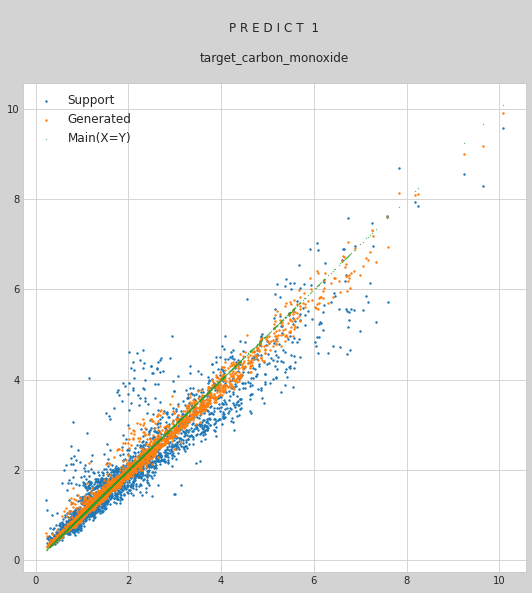

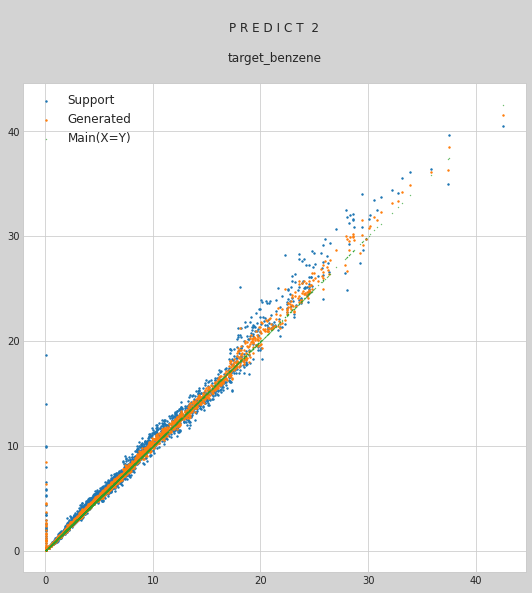

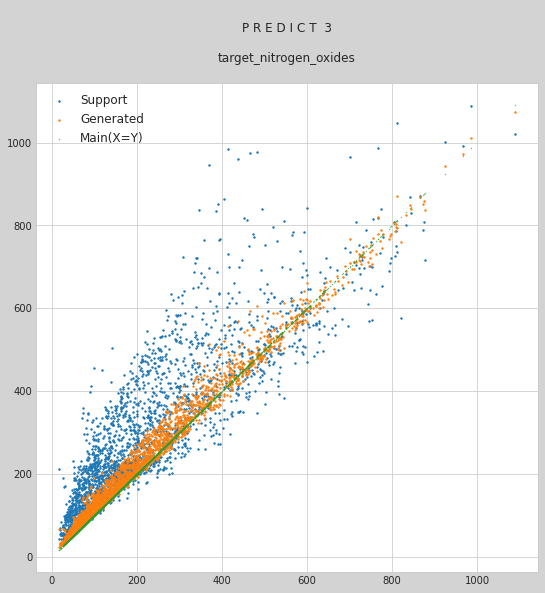

In [36]:
sub21744 = pd.read_csv('../input/tps7-21744/submission_gam.csv')

sub_ense = ensembling(sub21744, sub_leave, 0.65, 0.55, 0.75)

In [37]:
sub = sub_ense
sub.to_csv("submission_ense.csv",index=False)
# Public Score: 
!ls

__notebook__.ipynb   submission_leave.csv  val_X.csv   val_y2.csv
submission_ense.csv  submission_xgb.csv    val_y1.csv  val_y3.csv


<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>